In [31]:
# Import all necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd


## Q1. Write a python program to display all the header tags from wikipedia.org and make data frame. 

### Page Content 

In [133]:
# Send a request to the web page server to get the source code of wikipedia
 
page = requests.get("https://en.wikipedia.org/wiki/Main_Page")

page

<Response [200]>

In [132]:

# Get the Wikipedia main page

page = requests.get('https://en.wikipedia.org/wiki/Main_Page')

# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the header tags
headers = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

# Create a list of header tags
header_tags = []
for header in headers:
    header_tags.append(header.text)

# Create a data frame
df = pd.DataFrame({'Header': header_tags})

# Display the data frame
df


,Header
0,White House and Republicans reach a tentative ...
1,Latest News
2,QUOTE FINDER
3,Markets
4,Market MOVERS
5,Most Active
6,Unusual Volume
7,Latest Market News
8,Special Reports
9,Trending Now


##  Q2. Write s python program to display list of respected former presidents of India(i.e. Name , Term ofoffice)
from https://presidentofindia.nic.in/former-presidents.htm and make data frame.

In [135]:
page2 = requests.get("https://presidentofindia.nic.in/former-presidents.htm")
page2

<Response [200]>

In [136]:
president_list = soup.find('div', class_="presidentListing")
president_list

In [137]:
# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(page2.content, "html.parser")

# Find all the div elements with class "presidentListing"
president_list_all = soup.find_all('div', class_='presidentListing')

# Create empty lists to store president names and terms of office
names = []
terms_of_office = []

# Iterate over each president div
for president_all in president_list_all:
    # Extract the president's name
    name = president_all.find('h3').text.strip()
    names.append(name)

    # Extract the term of office
    term_of_office = president_all.find('p').text.split(':')[1].strip()
    terms_of_office.append(term_of_office)

# Create a DataFrame
df = pd.DataFrame({'President Name': names, 'Term of Office': terms_of_office})

# Display the DataFrame
df

,President Name,Term of Office
0,Shri Ram Nath Kovind (birth - 1945),"25 July, 2017 to 25 July, 2022"
1,Shri Pranab Mukherjee (1935-2020),"25 July, 2012 to 25 July, 2017"
2,Smt Pratibha Devisingh Patil (birth - 1934),"25 July, 2007 to 25 July, 2012"
3,DR. A.P.J. Abdul Kalam (1931-2015),"25 July, 2002 to 25 July, 2007"
4,Shri K. R. Narayanan (1920 - 2005),"25 July, 1997 to 25 July, 2002"
5,Dr Shankar Dayal Sharma (1918-1999),"25 July, 1992 to 25 July, 1997"
6,Shri R Venkataraman (1910-2009),"25 July, 1987 to 25 July, 1992"
7,Giani Zail Singh (1916-1994),"25 July, 1982 to 25 July, 1987"
8,Shri Neelam Sanjiva Reddy (1913-1996),"25 July, 1977 to 25 July, 1982"
9,Dr. Fakhruddin Ali Ahmed (1905-1977),"24 August, 1974 to 11 February, 1977"


## Q3 Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape and make data frame
a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
b) Top 10 ODI Batsmen along with the records of their team andrating.
c) Top 10 ODI bowlers along with the records of their team andrating 

In [138]:
# Function to scrape and create DataFrame for ODI teams
def scrape_odi_teams():
    # Send a GET request to the website
   
    page = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing team rankings
    table = soup.find('table', class_='table')

    # Extract the data from the table
    teams = []
    matches = []
    points = []
    ratings = []

    rows = table.find_all('tr')
    for row in rows[1:11]:
        columns = row.find_all('td')
        teams.append(columns[1].text.strip())
        matches.append(columns[2].text.strip())
        points.append(columns[3].text.strip())
        ratings.append(columns[4].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Team': teams, 'Matches': matches, 'Points': points, 'Rating': ratings})

    return df

# Scrape ODI teams
odi_teams_df = scrape_odi_teams()
print('----------------------------------------')
print("     Top 10 ODI Teams")
print('----------------------------------------')
odi_teams_df

----------------------------------------
     Top 10 ODI Teams
----------------------------------------


,Team,Matches,Points,Rating
0,Australia\nAUS,23,"2,714",118
1,Pakistan\nPAK,20,"2,316",116
2,India\nIND,33,"3,807",115
3,New Zealand\nNZ,27,"2,806",104
4,England\nENG,24,"2,426",101
5,South Africa\nSA,19,"1,910",101
6,Bangladesh\nBAN,25,"2,451",98
7,Afghanistan\nAFG,10,878,88
8,Sri Lanka\nSL,21,"1,682",80
9,West Indies\nWI,25,"1,797",72


In [139]:
# Function to scrape and create DataFrame for ODI batsmen
def scrape_odi_batsmen():
    # Send a GET request to the website
    #page = 'https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting'
    page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/batting')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing batsmen rankings
    table = soup.find('table', class_='table')

    # Extract the data from the table
    batsmen = []
    teams = []
    ratings = []

    rows = table.find_all('tr')
    for row in rows[1:11]:
        columns = row.find_all('td')
        batsmen.append(columns[1].text.strip())
        teams.append(columns[2].text.strip())
        ratings.append(columns[3].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Batsman': batsmen, 'Team': teams, 'Rating': ratings})

    return df

# Scrape ODI batsmen
odi_batsmen_df = scrape_odi_batsmen()
print('----------------------------------------')
print("            Top 10 ODI Batsmen:")
print('----------------------------------------')
odi_batsmen_df

----------------------------------------
            Top 10 ODI Batsmen:
----------------------------------------


,Batsman,Team,Rating
0,Babar Azam,PAK,886
1,Rassie van der Dussen,SA,777
2,Fakhar Zaman,PAK,755
3,Imam-ul-Haq,PAK,745
4,Shubman Gill,IND,738
5,David Warner,AUS,726
6,Harry Tector,IRE,722
7,Virat Kohli,IND,719
8,Quinton de Kock,SA,718
9,Rohit Sharma,IND,707


In [140]:
# Function to scrape and create DataFrame for ODI bowlers
def scrape_odi_bowlers():
    # Send a GET request to the website
    page = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/odi/bowling')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing bowlers rankings
    table = soup.find('table', class_='table')

    # Extract the data from the table
    bowlers = []
    teams = []
    ratings = []

    rows = table.find_all('tr')
    for row in rows[1:11]:
        columns = row.find_all('td')
        bowlers.append(columns[1].text.strip())
        teams.append(columns[2].text.strip())
        ratings.append(columns[3].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Bowler': bowlers, 'Team': teams, 'Rating': ratings})

    return df

# Scrape ODI bowlers
odi_bowlers_df = scrape_odi_bowlers()
print('----------------------------------------')
print("Top 10 ODI Bowlers:")
print('----------------------------------------')
odi_bowlers_df


----------------------------------------
Top 10 ODI Bowlers:
----------------------------------------


,Bowler,Team,Rating
0,Josh Hazlewood,AUS,705
1,Mohammed Siraj,IND,691
2,Mitchell Starc,AUS,686
3,Matt Henry,NZ,667
4,Trent Boult,NZ,660
5,Rashid Khan,AFG,659
6,Adam Zampa,AUS,652
7,Mujeeb Ur Rahman,AFG,637
8,Mohammad Nabi,AFG,631
9,Shaheen Afridi,PAK,630


## Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape and make data frame
a) Top 10 ODI teams in women’s cricket along with the records for matches, points and rating.
b) Top 10 women’s ODI Batting players along with the records of their team and rating.
c) Top 10 women’s ODI all-rounder along with the records of their team and rating.

In [141]:
# Function to scrape and create DataFrame for top 10 ODI teams in women's cricket
def scrape_odi_women_teams():
    # Send a GET request to the website
    page = requests.get('https://www.icc-cricket.com/rankings/womens/team-rankings/odi')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing team rankings
    table = soup.find('table', class_='table')

    # Extract the data from the table
    teams = []
    matches = []
    points = []
    ratings = []

    rows = table.find_all('tr')
    for i, row in enumerate(rows[1:11], 1):
        columns = row.find_all('td')
        teams.append(columns[1].text.strip())
        matches.append(columns[2].text.strip())
        points.append(columns[3].text.strip())
        ratings.append(columns[4].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Serial': range(1, 11), 'Team': teams, 'Matches': matches, 'Points': points, 'Rating': ratings})

    return df

# Scrape top 10 ODI women's teams
odi_women_teams_df = scrape_odi_women_teams()
print('----------------------------------------')
print("Top 10 ODI Teams in Women's Cricket")
print('----------------------------------------')
odi_women_teams_df


----------------------------------------
Top 10 ODI Teams in Women's Cricket
----------------------------------------


,Serial,Team,Matches,Points,Rating
0,1,Australia\nAUS,21,"3,603",172
1,2,England\nENG,28,"3,342",119
2,3,South Africa\nSA,26,"3,098",119
3,4,India\nIND,27,"2,820",104
4,5,New Zealand\nNZ,25,"2,553",102
5,6,West Indies\nWI,27,"2,535",94
6,7,Thailand\nTHA,11,821,75
7,8,Bangladesh\nBAN,14,977,70
8,9,Pakistan\nPAK,27,"1,678",62
9,10,Sri Lanka\nSL,9,479,53


In [124]:
# Function to scrape and create DataFrame for top 10 women's ODI batting players
def scrape_odi_women_batsmen():
    # Send a GET request to the website
    page = requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/batting')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing batsmen rankings
    table = soup.find('table', class_='table')

    if table is None:
        print("Table not found. Please check the URL and the webpage structure.")
        return None

    # Extract the data from the table
    batsmen = []
    teams = []
    ratings = []

    rows = table.find_all('tr')
    for i, row in enumerate(rows[1:11], 1):
        columns = row.find_all('td')
        batsmen.append(columns[1].text.strip())
        teams.append(columns[2].text.strip())
        ratings.append(columns[3].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Serial': range(1, 11), 'Batswoman': batsmen, 'Team': teams, 'Rating': ratings})

    return df

# Scrape top 10 women's ODI batting players
odi_women_batsmen_df = scrape_odi_women_batsmen()
print('----------------------------------------')
print("Top 10 Women's ODI Batting Players")
print('----------------------------------------')
odi_women_batsmen_df


----------------------------------------
Top 10 Women's ODI Batting Players
----------------------------------------


,Serial,Batswoman,Team,Rating
0,1,Beth Mooney,AUS,754
1,2,Laura Wolvaardt,SA,732
2,3,Natalie Sciver,ENG,731
3,4,Meg Lanning,AUS,717
4,5,Harmanpreet Kaur,IND,716
5,6,Smriti Mandhana,IND,714
6,7,Chamari Athapaththu,SL,673
7,8,Ellyse Perry,AUS,626
8,9,Tammy Beaumont,ENG,595
9,10,Stafanie Taylor,WI,588


In [142]:
# Function to scrape and create DataFrame for top 10 women's ODI all-rounders
def scrape_odi_women_allrounders():
    # Send a GET request to the website
    page = requests.get('https://www.icc-cricket.com/rankings/womens/player-rankings/odi/all-rounder')

    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find the table containing all-rounder rankings
    table = soup.find('table', class_='table')

    # Extract the data from the table
    allrounders = []
    teams = []
    ratings = []

    rows = table.find_all('tr')
    for i, row in enumerate(rows[1:11], 1):
        columns = row.find_all('td')
        allrounders.append(columns[1].text.strip())
        teams.append(columns[2].text.strip())
        ratings.append(columns[3].text.strip())

    # Create a DataFrame
    df = pd.DataFrame({'Serial': range(1, 11), 'All-Rounder': allrounders, 'Team': teams, 'Rating': ratings})

    return df
# Scrape top 10 women's ODI all-rounders
odi_women_allrounders_df = scrape_odi_women_allrounders()
print('----------------------------------------')
print("Top 10 Women's ODI All-Rounders:")
print('----------------------------------------')
odi_women_allrounders_df

----------------------------------------
Top 10 Women's ODI All-Rounders:
----------------------------------------


,Serial,All-Rounder,Team,Rating
0,1,Hayley Matthews,WI,373
1,2,Natalie Sciver,ENG,371
2,3,Ellyse Perry,AUS,366
3,4,Marizanne Kapp,SA,349
4,5,Amelia Kerr,NZ,336
5,6,Deepti Sharma,IND,322
6,7,Ashleigh Gardner,AUS,292
7,8,Jess Jonassen,AUS,250
8,9,Nida Dar,PAK,232
9,10,Sophie Ecclestone,ENG,205


## Q5. Write a python program to scrape mentioned news details from https://www.cnbc.com/world/?region=world and make data frame
i) Headline
ii) Time
iii) News Link 

In [143]:
# Set the maximum column width to None
pd.set_option('display.max_colwidth', None)

# Function to extract headline, link, date, and time from news articles
def extract_article_details(article):
    headline = article.find('a').text.strip()
    link = article.find('a')['href']
    page = requests.get(link)
    article_soup = BeautifulSoup(page.content, 'html.parser')
    date_element = article_soup.find('time')
    if date_element is not None and 'datetime' in date_element.attrs:
        date = date_element['datetime'].split('T')[0]
        time =  ' '.join(date_element.text.strip().split()[-3:])[4:]

    else:
        date = 'Not available'
        time = 'Not available'
    return headline, link, date, time

# Send a GET request to the website
page = requests.get('https://www.cnbc.com/world/?region=world')

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(page.content, 'html.parser')

# Find all the news articles
articles = soup.find_all('div', class_='Card-titleContainer')

# Extract article details for each article
article_details = [extract_article_details(article) for article in articles]
headlines, links, dates, times = zip(*article_details)

# Create a DataFrame
df = pd.DataFrame({'Headline': headlines, 'Date': dates, 'Time': times, 'News Link': links})

# Print the DataFrame
df


,Headline,Date,Time,News Link
0,Mastercard's stock has outperformed Visa's over the past 5 years. Here's why,2023-05-27,8:00 AM EDT,https://www.cnbc.com/2023/05/27/how-mastercard-has-outperformed-visa.html
1,Here’s why Shake Shack’s recent deal with Engaged Capital may have fallen short for shareholders,2023-05-27,8:04 AM EDT,https://www.cnbc.com/2023/05/27/shake-shacks-recent-deal-with-engaged-capital-may-have-fallen-short-for-shareholders.html
2,Russia carries out intense missile and drone strike overnight; Russia's Medvedev says conflict could last...,Not available,Not available,https://www.cnbc.com/2023/05/26/ukraine-war-live-updates-latest-news-on-russia-and-the-war-in-ukraine.html
3,Ukraine set to get F-16 fighter jets; Russian mercenaries pull out of Bakhmut,Not available,Not available,https://www.cnbc.com/2023/05/25/ukraine-war-live-updates-latest-news-on-russia-and-the-war-in-ukraine.html
4,German economy enters recession as first-quarter GDP data is revised lower,2023-05-25,2:21 AM EDT,https://www.cnbc.com/2023/05/25/german-economy-enters-recession-as-first-quarter-gdp-data-is-revised-lower.html
5,"Without a hint of irony, Putin rages against countries that meddle in other states",2023-05-24,8:11 AM EDT,https://www.cnbc.com/2023/05/24/having-invaded-ukraine-putin-rages-against-countries-that-meddle.html
6,Russia says it'll react 'extremely harshly' to new border attacks; Kyiv fights back in Bakhmut,Not available,Not available,https://www.cnbc.com/2023/05/24/ukraine-war-live-updates-latest-news-on-russia-and-the-war-in-ukraine.html
7,"Solar investment set to overtake oil production and attract over $1 billion a day in 2023, IEA says",2023-05-25,1:15 AM EDT,https://www.cnbc.com/2023/05/25/investment-in-fossil-fuels-set-to-exceed-1-trillion-in-2023-iea-says.html
8,France bans short-haul flights as it looks to cut transport emissions,2023-05-24,7:30 AM EDT,https://www.cnbc.com/2023/05/24/france-bans-domestic-short-haul-flights.html
9,"Cacti, wild coffee and false bananas: Scientists sketch out the menus of the future",2023-05-23,1:24 AM EDT,https://www.cnbc.com/2023/05/23/cacti-and-false-bananas-scientists-sketch-out-menus-of-the-future.html


## Q6. Write a python program to scrape the details of most downloaded articles from AI in last 90
days.https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles
Scrape below mentioned details and make data frame
i) Paper Title
ii) Authors
iii) Published Date
iv) Paper URL 

In [131]:

# Send GET request to the web page
page = requests.get("https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles")

# Create BeautifulSoup object
soup = BeautifulSoup(page.content, "html.parser")

# Find all article elements
articles = soup.find_all("li", class_="sc-9zxyh7-1 sc-9zxyh7-2 kOEIEO hvoVxs")

# Initialize lists to store the details
paper_titles = []
authors = []
published_dates = []
paper_urls = []

# Iterate over the articles and extract the details
for article in articles:
    # Extract paper title
    paper_title = article.find("h2", class_="sc-1qrq3sd-1 gRGSUS sc-1nmom32-0 sc-1nmom32-1 btcbYu goSKRg").text.strip()
    paper_titles.append(paper_title)
    
    # Extract authors
    author_names = [author.text.strip() for author in article.find_all("span", class_="sc-1w3fpd7-0 dnCnAO")]
    authors.append(", ".join(author_names))
    
    # Extract published date
    published_date = article.find("span", class_="sc-1thf9ly-2 dvggWt").text.strip()
    published_dates.append(published_date)
    
    # Extract paper URL
    paper_url = article.find("a", class_="sc-5smygv-0 fIXTHm")["href"]
    paper_urls.append(paper_url)

# Create a dataframe from the extracted details
data = {
    "Paper Title": paper_titles,
    "Authors": authors,
    "Published Date": published_dates,
    "Paper URL": paper_urls
}
df = pd.DataFrame(data)

# Display the dataframe
df


,Paper Title,Authors,Published Date,Paper URL
0,Reward is enough,"David Silver, Satinder Singh, Doina Precup, Ri...",October 2021,https://www.sciencedirect.com/science/article/...
1,Explanation in artificial intelligence: Insigh...,Tim Miller,February 2019,https://www.sciencedirect.com/science/article/...
2,Creativity and artificial intelligence,Margaret A. Boden,August 1998,https://www.sciencedirect.com/science/article/...
3,Conflict-based search for optimal multi-agent ...,"Guni Sharon, Roni Stern, Ariel Felner, Nathan ...",February 2015,https://www.sciencedirect.com/science/article/...
4,Knowledge graphs as tools for explainable mach...,"Ilaria Tiddi, Stefan Schlobach",January 2022,https://www.sciencedirect.com/science/article/...
5,Law and logic: A review from an argumentation ...,"Henry Prakken, Giovanni Sartor",October 2015,https://www.sciencedirect.com/science/article/...
6,Between MDPs and semi-MDPs: A framework for te...,"Richard S. Sutton, Doina Precup, Satinder Singh",August 1999,https://www.sciencedirect.com/science/article/...
7,Explaining individual predictions when feature...,"Kjersti Aas, Martin Jullum, Anders Løland",September 2021,https://www.sciencedirect.com/science/article/...
8,Multiple object tracking: A literature review,"Wenhan Luo, Junliang Xing and 4 more",April 2021,https://www.sciencedirect.com/science/article/...
9,A survey of inverse reinforcement learning: Ch...,"Saurabh Arora, Prashant Doshi",August 2021,https://www.sciencedirect.com/science/article/...


## Q7. Write a python program to scrape mentioned details from dineout.co.in and make data frame
i) Restaurant name
ii) Cuisine
iii) Location
iv) Ratings
v) Image URL 

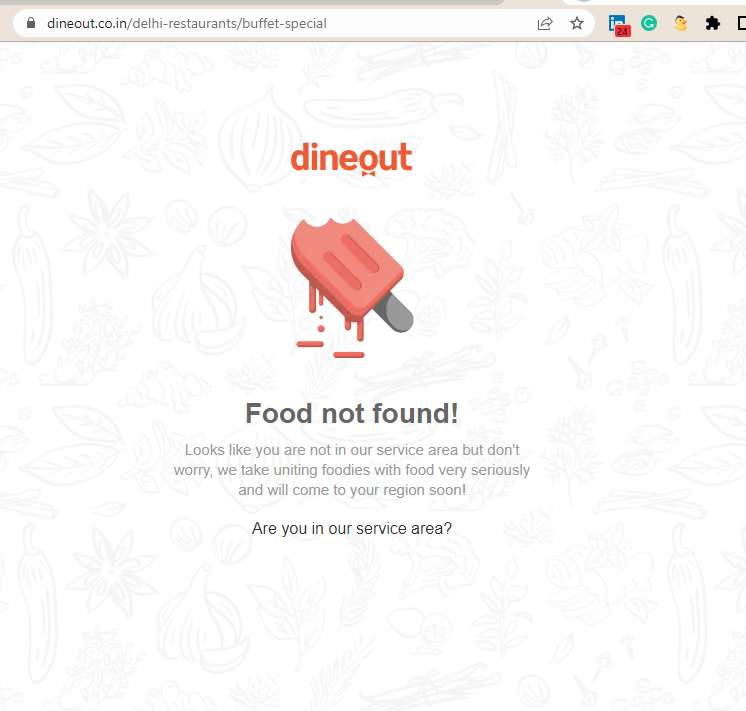